The objective of this notebook is to show how to read and plot the data obtained with a vessel.

In [1]:
%matplotlib inline
import netCDF4
from netCDF4 import num2date
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap

# Data reading

The data file is located in the *datafiles* directory.

In [29]:
datadir = './datafiles/'
datafile = 'GL_PR_ML_EXRE0065_2010.nc'

We extract only the spatial coordinates:

In [45]:
with netCDF4.Dataset(datadir + datafile) as nc:
    lon = nc.variables['LONGITUDE'][:]
    lat = nc.variables['LATITUDE'][:]
print lon.shape

(63,)


# Location of the profiles

In this first plot we want to see the location of the profiles obtained with the profiler.<br/>
We create a Mercator projection using the coordinates we just read.

In [100]:
m = Basemap(projection='merc', llcrnrlat=lat.min()-0.5, urcrnrlat=lat.max()+0.5,
            llcrnrlon=lon.min()-0.5, urcrnrlon=lon.max()+0.5, lat_ts=0.5*(lon.min()+lon.max()), resolution='h')

Once we have the projection, the coordinates have to be changed into this projection:

In [101]:
lon2, lat2 = m(lon, lat)

The locations of the vessel stations are added on a map with the coastline and the land mask.

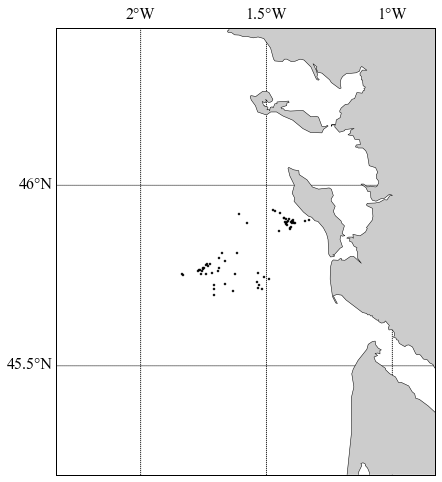

In [103]:
mpl.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(8,8))
m.plot(lon2, lat2, 'ko', ms=2)

m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)

m.drawparallels(np.arange(-90.,91.,0.5), labels=[1,0,0,0], zorder=1)
m.drawmeridians(np.arange(-180.,181.,0.5), labels=[0,0,1,0], zorder=1)
plt.show()

# Profile plot

We read the temperature, salinity and depth variables.

In [43]:
with netCDF4.Dataset(datadir + datafile) as nc:
    depth = nc.variables['DEPH'][:]
    temperature = nc.variables['TEMP'][:]
    temperature_name = nc.variables['TEMP'].long_name
    temperature_units = nc.variables['TEMP'].units
    salinity = nc.variables['PSAL'][:]
    salinity_name = nc.variables['PSAL'].long_name
    salinity_units = nc.variables['PSAL'].units
    time = nc.variables['TIME'][:]
    time_units = nc.variables['TIME'].units

In [53]:
print depth.shape
print temperature.shape

(63, 215)
(63, 215)


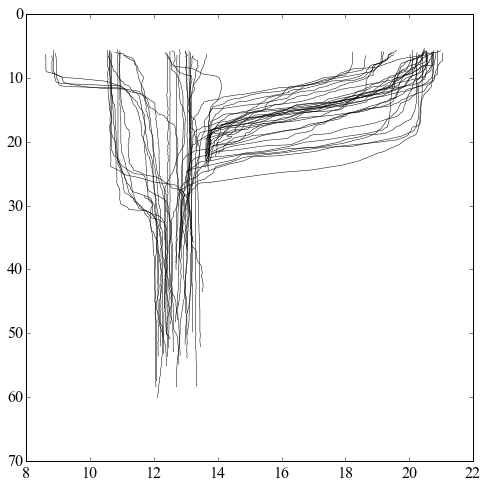

In [75]:
nprofiles, ndepths = depth.shape

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
for nn in range(0, nprofiles):
    plt.plot(temperature[nn,:], depth[nn,:], 'k-', linewidth=0.5)
plt.gca().invert_yaxis()
plt.show()

We observe different types of profiles. As the covered region is rather small, this may be because the measurements were done at different time of the year. The time variable will tell us.<br/>
We create a plot of time versus temperature (first measurement of each profile).

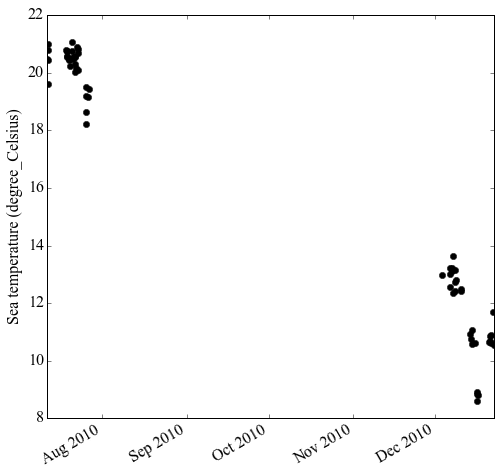

In [99]:
dates = num2date(time, units=time_units)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.plot(dates, temperature[:,0], 'ko')
fig.autofmt_xdate()
plt.ylabel("%s (%s)" % (temperature_name, temperature_units))
plt.show()

The graph confirms that we have data obtained during different periods:
* July-August 2010,
* December 2010.

# T-S diagram

The x and y labels for the plot are directly taken from the netCDF variable attributes.

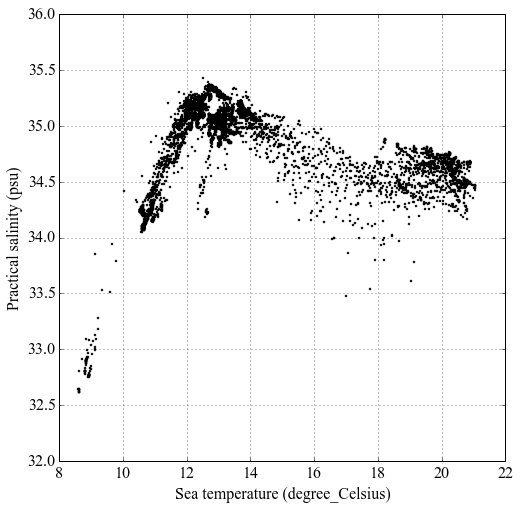

In [95]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.plot(temperature, salinity, 'ko', markersize=2)
plt.xlabel("%s (%s)" % (temperature_name, temperature_units))
plt.ylabel("%s (%s)" % (salinity_name, salinity_units))
plt.ylim(32, 36)
plt.grid()
plt.show()

# 3-D plot

We illustrate with a simple example how to have a 3-dimensional representation of the profiles.<br/>
First we import the required modules.

In [64]:
from mpl_toolkits.mplot3d import Axes3D

Then the plot is easily obtained by specifying the coordinates (x, y, z) and the variables (salinity) to be plotted.

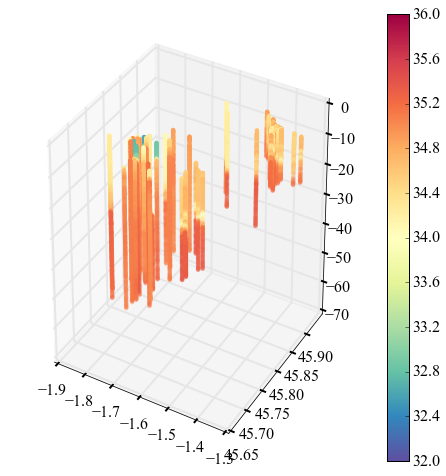

In [97]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=32, vmax=36)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for ntime in range(0, nprofiles):
    plt.scatter(lon[ntime]*np.ones(ndepths), lat[ntime]*np.ones(ndepths), zs=-depth[ntime,:], zdir='z', 
                s=20, c=salinity[ntime,:], edgecolor='None', cmap=cmap, norm=norm)
plt.colorbar(cmap=cmap, norm=norm)
plt.show()